In [68]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn import tree

In [69]:
data =  pd.read_csv('./backpain.csv')
data.head(10)

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,0.789993,29.3230,12.0036,10.40462,-1.512209,9.6548,Abnormal
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,0.198920,13.8514,10.7146,11.37832,-20.510434,25.9477,Abnormal
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,0.131973,28.8165,7.7676,7.60961,-25.111459,26.3543,Abnormal
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,0.190408,22.7085,11.4234,10.59188,-20.020075,40.0276,Abnormal
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,0.367700,26.2011,8.7380,14.91416,-1.702097,21.4320,Abnormal


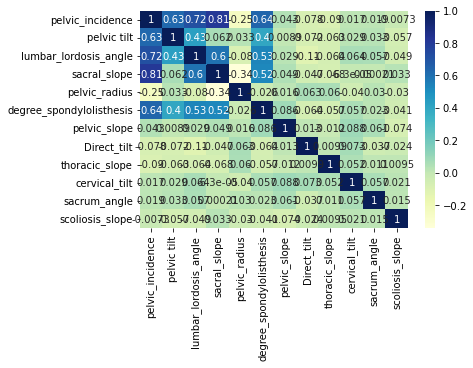

<Figure size 864x864 with 0 Axes>

In [70]:
var_corr = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap

plt.figure(figsize=(12, 12))
plt.show()

In [71]:
status_change = {
    'Status': {'Abnormal':1,'Normal':0}
}

data.Status[data['Status']=='Normal']=0
data.Status[data['Status']=='Abnormal']=1


data.head(10)

c:\Users\gelso\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\Users\gelso\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,1
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,0.789993,29.3230,12.0036,10.40462,-1.512209,9.6548,1
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,0.198920,13.8514,10.7146,11.37832,-20.510434,25.9477,1
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,0.131973,28.8165,7.7676,7.60961,-25.111459,26.3543,1
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,0.190408,22.7085,11.4234,10.59188,-20.020075,40.0276,1
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,0.367700,26.2011,8.7380,14.91416,-1.702097,21.4320,1


In [72]:
X = data.drop(columns=["Status"])
Y = data["Status"].astype('int')

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state = 1)

print('Ratio of 0',len(Y_test[Y_test.values==0])/len(Y_test))
print('Ratio of 1',len(Y_test[Y_test.values==1])/len(Y_test))


Ratio of 0 0.2903225806451613
Ratio of 1 0.7096774193548387


In [73]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(Y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(Y_test,pred_test))



In [63]:
Y_train

67     1
283    0
122    1
34     1
197    1
      ..
203    1
255    0
72     1
235    0
37     1
Name: Status, Length: 217, dtype: int32

In [79]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver="liblinear", random_state=1)
model.fit(X_train, Y_train)

y_predict = model.predict(X_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

get_recall_score(model)

          0         1      2         3         4         5         6  \
0  0.035132  0.088027 -0.038 -0.052895 -0.023428  0.137437  0.238762   

          7         8         9        10        11  intercept  
0  0.005219 -0.016468  0.086542 -0.002245 -0.001083    1.37206  
Recall on training set :  0.8680555555555556
Recall on test set :  0.8787878787878788


In [75]:
model_score = model.score(X_test, Y_test)
print(model_score)

0.8709677419354839


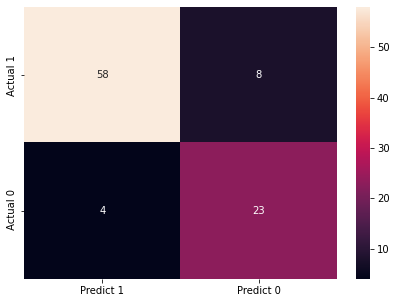

In [80]:
cm=metrics.confusion_matrix(Y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1"," Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')
plt.show()

In [45]:
for i in np.arange(1,9):
    dTree = DecisionTreeClassifier(criterion = 'gini', max_depth=i,random_state=1)
    dTree.fit(X_train, Y_train)

    # Recall on train and test
    print('For max depth:', i)
    get_recall_score(dTree)

For max depth: 1
Recall on training set :  0.6875
Recall on test set :  0.7121212121212122
For max depth: 2
Recall on training set :  0.8888888888888888
Recall on test set :  0.8636363636363636
For max depth: 3
Recall on training set :  0.8888888888888888
Recall on test set :  0.7575757575757576
For max depth: 4
Recall on training set :  0.9583333333333334
Recall on test set :  0.8484848484848485
For max depth: 5
Recall on training set :  0.9652777777777778
Recall on test set :  0.7727272727272727
For max depth: 6
Recall on training set :  0.9930555555555556
Recall on test set :  0.803030303030303
For max depth: 7
Recall on training set :  0.9861111111111112
Recall on test set :  0.803030303030303
For max depth: 8
Recall on training set :  1.0
Recall on test set :  0.7878787878787878


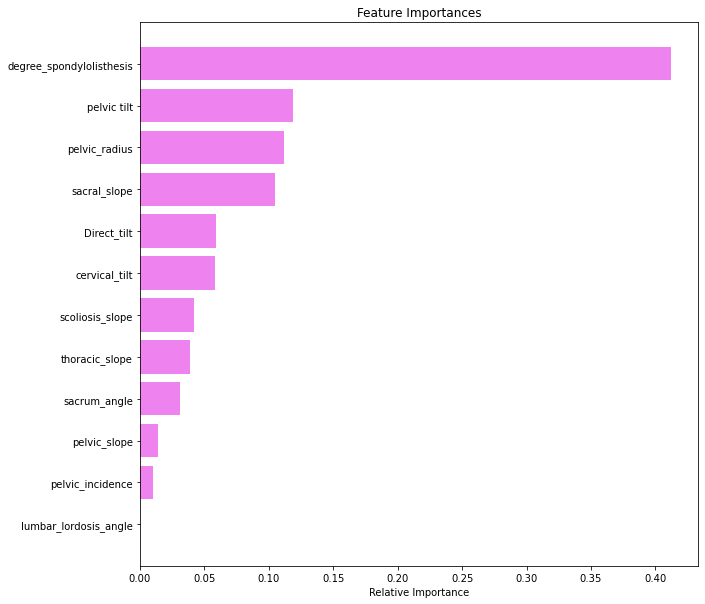

In [46]:
importances = dTree.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [47]:
dTree = DecisionTreeClassifier(criterion = 'entropy', max_depth=8,random_state=1)
dTree.fit(X_train, Y_train)

# Recall on train and test
print('For max depth:', 8)
get_recall_score(dTree)

For max depth: 8
Recall on training set :  1.0
Recall on test set :  0.8333333333333334


In [49]:
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': [5,10,15,'None'], 
              'criterion': ['gini','entropy'],
              'splitter' : ['best','random'],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=3)
grid_obj = grid_obj.fit(X_train, Y_train)

print(grid_obj.best_estimator_)
# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=1,
                       splitter='random')


c:\Users\gelso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\gelso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\gelso\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "c:\Users\gelso\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 285, in fit
    if max_depth <= 0:
TypeError: '<=' not supported between instances of 'str' and 'int'

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\Users\gelso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Deta

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=1,
                       splitter='random')

In [52]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.004224,0.008449
2,0.004558,0.017564
3,0.005672,0.034579
4,0.005907,0.052300
5,0.006144,0.058445
6,0.007562,0.066007
7,0.007680,0.073688
8,0.007900,0.081587
9,0.008980,0.090568
